In [259]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [100]:
nameIndex=['01','02','03','04','05','06','07','08','09','10','11','12']
cefeidaData= {}

for i in nameIndex:
    name='M100Ceph-'+i+'.txt'
    cefeidaData[i] = pd.read_csv('Data/'+name,sep='\s+')
    


In [ ]:
for i in nameIndex:
    plt.figure(i)
    plt.scatter(cefeidaData[i]['t'],cefeidaData[i]['Mag'])
    plt.plot(cefeidaData[i]['t'],cefeidaData[i]['Mag'])
    plt.title('Diagrama Perdiodo-Luminocidad cefeida '+i+' de M100')
    plt.xlabel("t [días]")
    plt.ylabel("Magnitud aparente [Mv]")
    plt.ylim(max(cefeidaData[i]['Mag'])+0.05,min(cefeidaData[i]['Mag'])-0.05)
    plt.grid()
    plt.minorticks_on()

In [122]:
cefeidaCalculate = pd.read_csv('Data/fft_ceph')
cefeidaCalculate['Periodo'] = 1/ cefeidaCalculate['Frec']
cefeidaCalculate['MagAbosluta'] = -1.43-2.81*np.log10(cefeidaCalculate['Periodo'])
aux = []
for i in nameIndex:
    aux.append(cefeidaData[i]['Mag'].mean())

cefeidaCalculate['MagAparente']=aux
cefeidaCalculate['Distancia']= 10**((cefeidaCalculate['MagAparente']-cefeidaCalculate['MagAbosluta']+5)/5)/10**6
Distancia = cefeidaCalculate['Distancia'].mean()
print(cefeidaCalculate)
print(Distancia)

        Frec       amp    Periodo  MagAbosluta  MagAparente  Distancia
0   0.017347  0.352730  57.646857    -6.377780    24.924167  18.213325
1   0.022017  0.463300  45.418500    -6.086824    25.157458  17.736033
2   0.024291  0.515673  41.167179    -5.966889    25.502042  19.669171
3   0.024050  0.377131  41.580000    -5.979065    25.369792  18.611073
4   0.026045  0.528472  38.394857    -5.881807    26.374739  28.268924
5   0.029706  0.578502  33.663429    -5.721315    26.413875  26.732402
6   0.030996  0.606717  32.261765    -5.669414    26.348909  25.331712
7   0.036825  0.568163  27.155263    -5.459130    25.836708  18.162165
8   0.034208  0.387503  29.232571    -5.549086    26.328292  23.739720
9   0.036397  0.419752  27.474857    -5.473409    25.533833  15.901877
10  0.036671  0.480019  27.269412    -5.464249    26.312250  22.662081
11  0.408814  0.678509   2.446100    -2.521612    26.342526   5.926902
20.07961552893393


PARA M31    

In [281]:
cefeidaCalculate_M31 = pd.read_csv('Data/cepheidM31.txt',sep=';')
cefeidaCalculate_M31['MagAbsoluta'] = -1.97-2.81*np.log10(cefeidaCalculate_M31['Per'])
cefeidaCalculate_M31['Distancia'] = 10**((cefeidaCalculate_M31['Icmag']-cefeidaCalculate_M31['MagAbsoluta']+5)/5)*3.26/10**6
print(cefeidaCalculate_M31[['Rcmag','Icmag','DeltaRc','Per','MagAbsoluta','Distancia']])

    Rcmag  Icmag  DeltaRc     Per  MagAbsoluta  Distancia
0   20.48  19.98     0.27   7.459    -4.422233   2.475507
1   20.17  19.69     0.15   8.566    -4.591106   2.341202
2   20.61  20.28     0.22   8.836    -4.628979   3.126175
3   20.28  19.54     0.11   9.160    -4.672926   2.268835
4   20.56  20.04     0.19   9.790    -4.754099   2.965087
5   20.43  19.76     0.15  10.383    -4.825867   2.693959
6   20.42  20.27     0.28  10.500    -4.839542   3.428672
7   19.89  19.55     0.17  11.170    -4.915029   2.548141
8   20.21  19.60     0.26  13.773    -5.170670   2.933267
9   20.77  19.84     0.48  14.420    -5.226692   3.361678
10  19.57  18.87     0.16  15.260    -5.295788   2.220114
11  20.84  20.08     0.32  15.460    -5.311679   3.904391
12  19.82  19.46     0.40  15.760    -5.335133   2.966499
13  19.93  19.58     0.22  15.900    -5.345926   3.150669
14  20.79  19.91     0.30  15.950    -5.349758   3.674253
15  20.28  19.74     0.40  16.380    -5.382222   3.448752
16  20.12  19.

3.161517684859724


Text(0, 0.5, 'Numero de cefeidas')

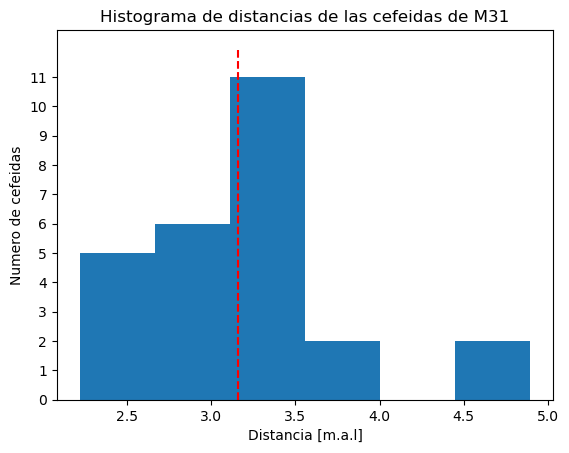

In [282]:
Distancia_M31 = cefeidaCalculate_M31['Distancia'].mean()
print(Distancia_M31) #millones de años luz
plt.figure()
plt.yticks(range(0,12,1))
plt.title('Histograma de distancias de las cefeidas de M31')
hist = plt.hist(cefeidaCalculate_M31['Distancia'],6)
plt.vlines(x=Distancia_M31,ymin=0,ymax=12,linestyles="--",colors='r')
plt.xlabel("Distancia [m.a.l]")
plt.ylabel("Numero de cefeidas")




3.0332399672502937


Text(0.5, 0, 'Distancia [m.a.l]')

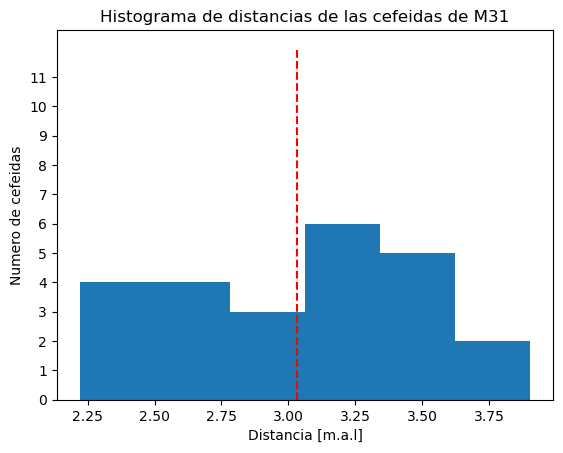

In [283]:
#Eliminamos las cefeidas atipicas
Distancia_M31 = cefeidaCalculate_M31['Distancia'][cefeidaCalculate_M31.Distancia<4].mean()
print(Distancia_M31)
plt.figure()
plt.hist(cefeidaCalculate_M31['Distancia'][cefeidaCalculate_M31.Distancia<4],6)
plt.vlines(x=Distancia_M31,ymin=0,ymax=12,linestyles="--",colors='r')
plt.yticks(range(0,12,1))
plt.title('Histograma de distancias de las cefeidas de M31')
plt.ylabel("Numero de cefeidas")
plt.xlabel("Distancia [m.a.l]")



In [358]:
logP = np.log10(cefeidaCalculate_M31['Per'][cefeidaCalculate_M31.Distancia<4]) 
print(logP)

0     0.872681
1     0.932778
2     0.946256
3     0.961895
4     0.990783
5     1.016323
6     1.021189
7     1.048053
8     1.139029
9     1.158965
10    1.183555
11    1.189209
12    1.197556
13    1.201397
14    1.202761
15    1.214314
16    1.220108
17    1.248709
18    1.251151
19    1.302980
20    1.331225
21    1.431203
22    1.459091
24    1.638789
Name: Per, dtype: float64


In [360]:
def line(x,b):
    return -2.96*x+b

Icmagfit,IcmagCov = curve_fit(line,logP,cefeidaCalculate_M31['Icmag'][cefeidaCalculate_M31.Distancia<4])
print(Icmagfit,IcmagCov)

[23.02473319] [[0.00515716]]


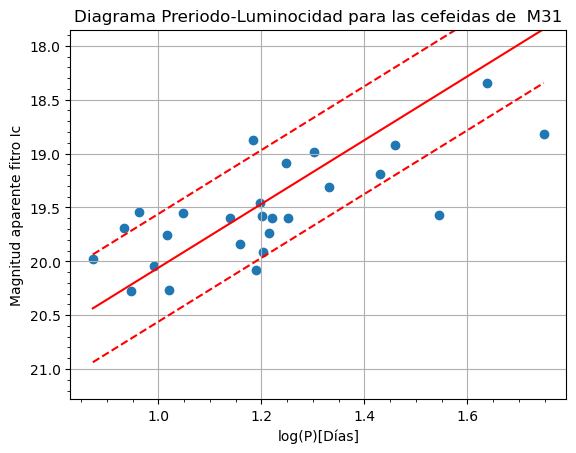

In [346]:

plt.figure()
plt.title('Diagrama Preriodo-Luminocidad para las cefeidas de  M31')
plt.scatter(logP,cefeidaCalculate_M31['Icmag'])
plt.plot(logP,line(logP,23.02)+0.5,"r--")
plt.plot(logP,line(logP,23.02)-0.5,"r--")
plt.plot(logP,line(logP,23.02),"r")
plt.xlabel("log(P)[Días]")
plt.ylabel("Magnitud aparente fitro Ic")
plt.ylim(max(cefeidaCalculate_M31['Icmag'])+1,min(cefeidaCalculate_M31['Icmag'])-0.5)
plt.grid()
plt.minorticks_on()

In [362]:
Distancia_M31 = Icmagfit[0] + 1.97 #Distancia real utilizando la relaciòn del filtro
print(Distancia_M31)

24.99473319220712


Calculo de la consatante de Hubel y edad del universo

In [368]:
velHe_M31  = -300.991670  #km/s
velHe_M100 = 1570.912700  #km/s

H0_M31  = velHe_M31/(Distancia_M31/3.26)
H0_M100 = velHe_M100/Distancia

convet = 3.086e+19/(1e6*365*24*60*60)
t_M31 = 1/(H0_M31)*convet       #millones de años 
t_M100 = 1/(H0_M100)*convet     #millones de años

print(H0_M100,H0_M31)
print(t_M31,t_M100)

78.23420213083149 -39.257584254027144
-24926.75489879619 12508.137796082037
